In [1]:
import os
import pandas as pd
import reflect.plotting as rp

# Configure the notebook to display the plot inline
%matplotlib inline

In [2]:
data_folder = "../data"
# os.listdir(data_folder)
file_path = os.path.join(data_folder, "Meditation.csv")
df_raw = pd.read_csv(file_path)

In [3]:
# Select some columns for additional analysis
df = df_raw[['Date', 'Forgetting', 'Concentration', 'Mindfulness', 'Investigation', 'Energy', 'Tranquility', 'Distracted']]
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

In [4]:
# Display the first 5 rows of the DataFrame
print(df.head())

                     Forgetting  Concentration  Mindfulness  Investigation   
Date                                                                         
2023-03-31 13:58:58           2              2            2            1.0  \
2023-03-31 07:53:28           3              1            0            0.0   
2023-04-01 14:56:07           2              1            2            1.0   
2023-04-01 20:07:51           2              3            3            1.0   
2023-04-02 08:03:22           1              2            1            0.0   

                     Energy  Tranquility  Distracted  
Date                                                  
2023-03-31 13:58:58       1            2         NaN  
2023-03-31 07:53:28       1            0         NaN  
2023-04-01 14:56:07       1            1         NaN  
2023-04-01 20:07:51       2            3         NaN  
2023-04-02 08:03:22       1            2         NaN  


# Time Series Plotting

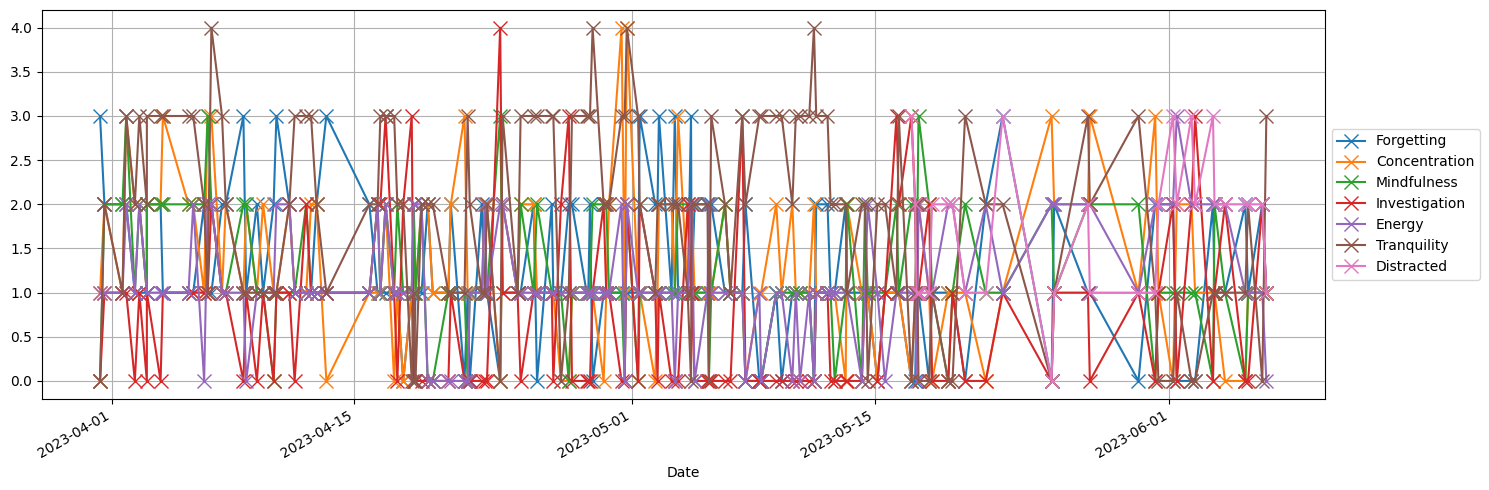

In [11]:
rp.plot(df)

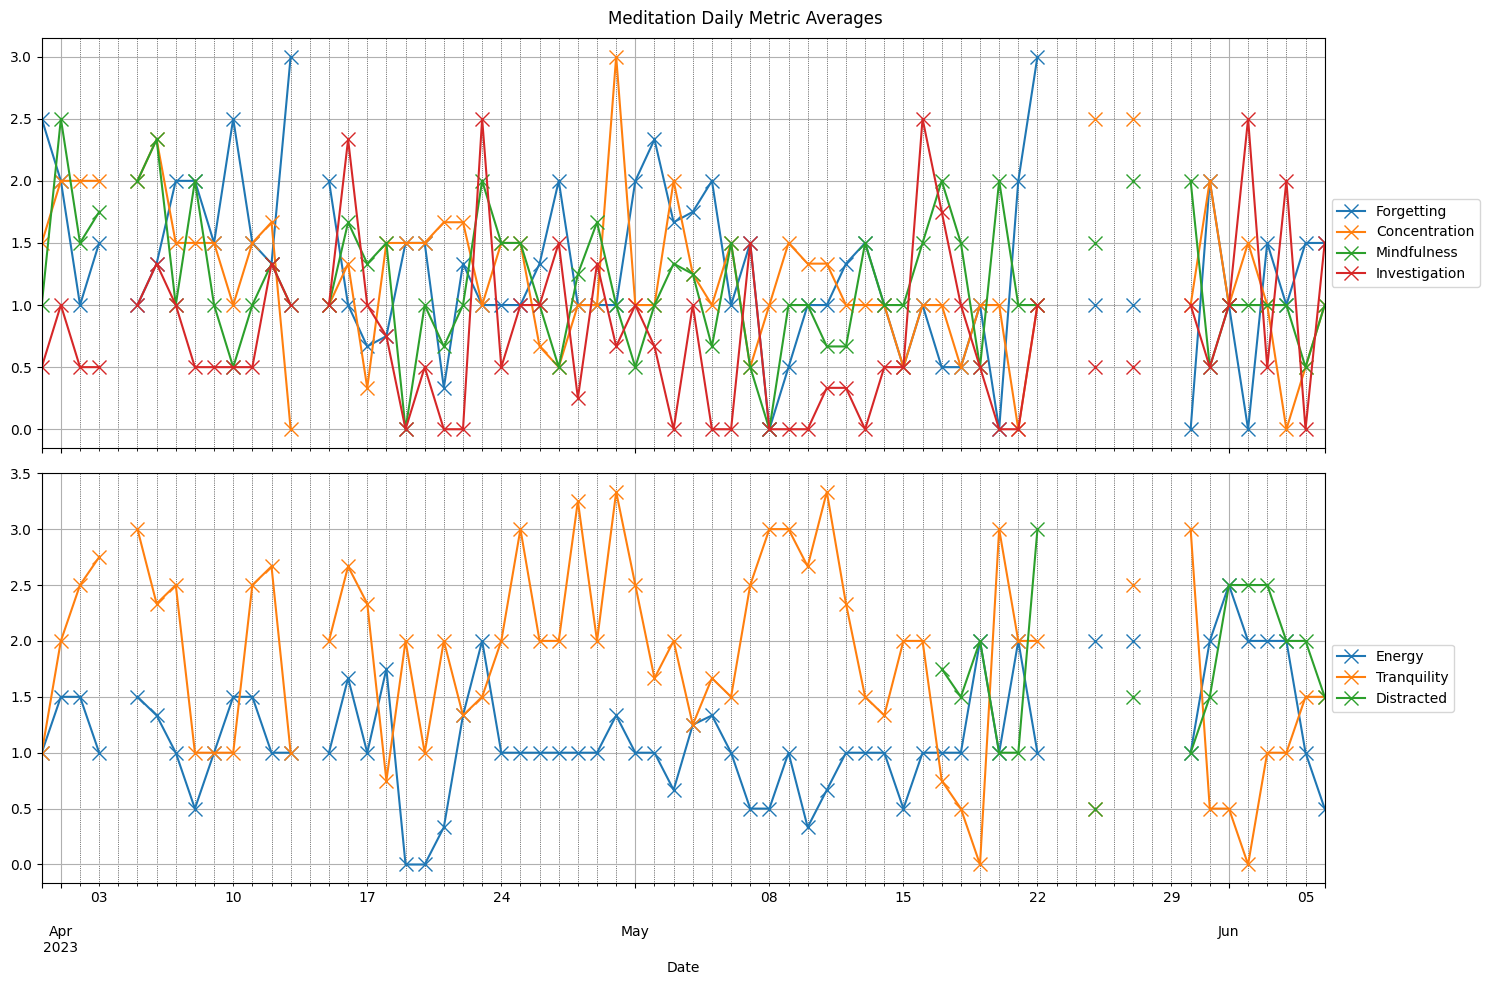

In [12]:
rp.plot(df, frequency='daily', max_metrics_per_subplot=4, title="Meditation Daily Metric Averages")

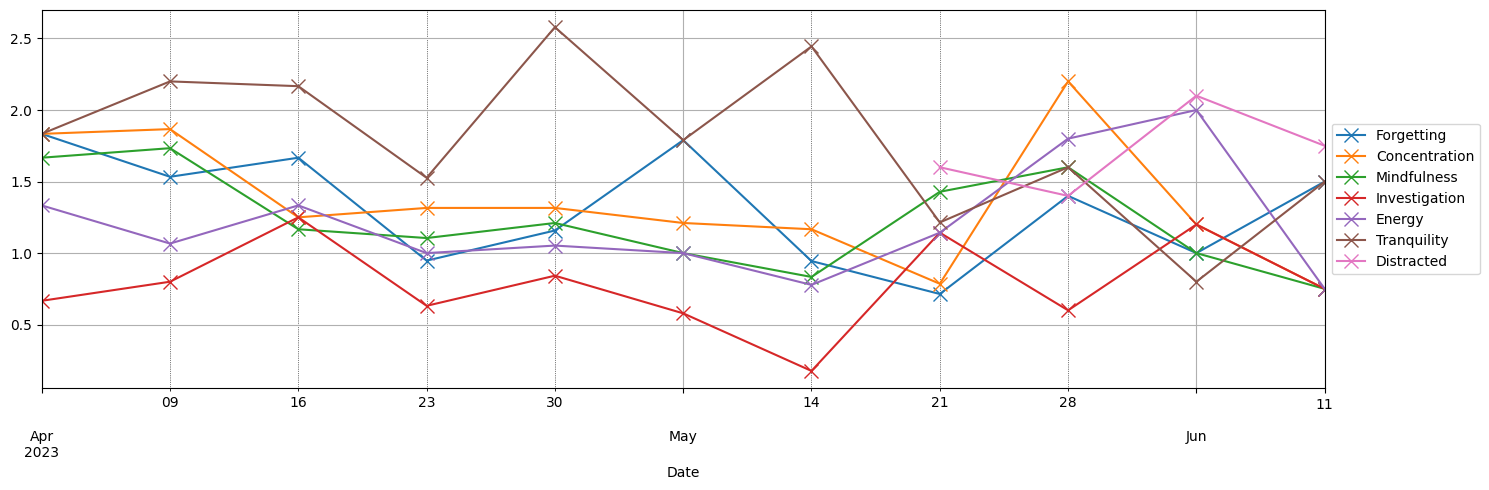

In [8]:
rp.plot(df, frequency='weekly', sampling_method='mean')

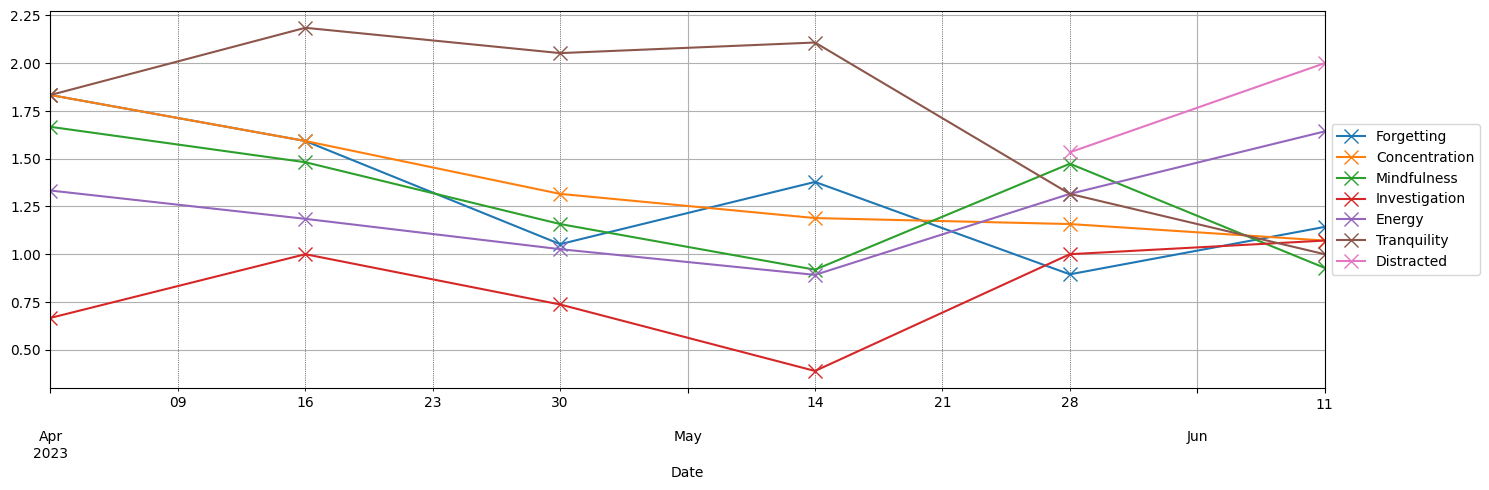

In [9]:
rp.plot(df, frequency='biweekly', sampling_method='mean')

# Filtered Correlation Plotting

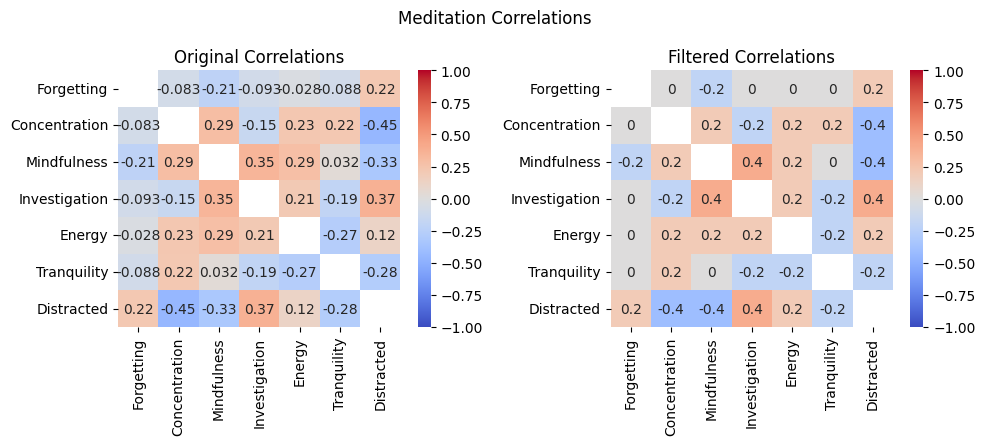

In [10]:
rp.filtered_correlation_plot(df, title="Meditation Correlations")